# Naive Bayes

In [1]:
# Import library yang diperlukan
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

# Membaca dataset yang sudah di-balance
df_balanced = pd.read_csv('data-analisis/datasets-balanced.csv')

# Memisahkan fitur dan label
X = df_balanced.drop(columns=['label'])  # Menghapus kolom label
y = df_balanced['label']  # Mengambil kolom label

# Membagi dataset menjadi data latih (80%) dan data uji 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Membuat model Naive Bayes
nb_model = GaussianNB()  # Model Naive Bayes
nb_model.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = nb_model.predict(X_test)

# Menampilkan hasil evaluasi
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Evaluasi model menggunakan cross-validation
cv_scores = cross_val_score(nb_model, X, y, cv=5)  # Menggunakan 5-fold cross-validation

# Menampilkan hasil cross-validation
print("\nCross-Validation Scores:")
print(cv_scores)
print(f"Mean Cross-Validation Score: {cv_scores.mean():.4f}")
print(f"Standard Deviation of Cross-Validation Scores: {cv_scores.std():.4f}")

Confusion Matrix:
[[225 187 179]
 [  4 579   8]
 [ 48  79 464]]

Classification Report:
              precision    recall  f1-score   support

     Negatif       0.81      0.38      0.52       591
      Netral       0.69      0.98      0.81       591
     Positif       0.71      0.79      0.75       591

    accuracy                           0.72      1773
   macro avg       0.74      0.72      0.69      1773
weighted avg       0.74      0.72      0.69      1773


Cross-Validation Scores:
[0.68020305 0.6965595  0.6999436  0.74393683 0.76931754]
Mean Cross-Validation Score: 0.7180
Standard Deviation of Cross-Validation Scores: 0.0332


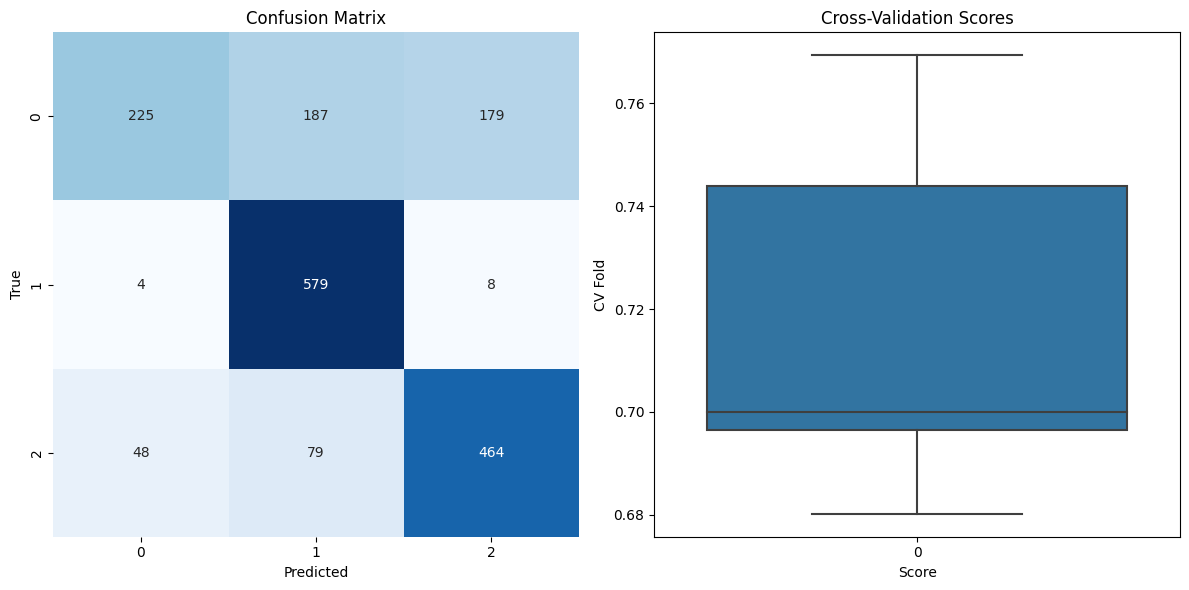

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualization
plt.figure(figsize=(12, 6))

# Subplot for Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

# Subplot for Cross-Validation Scores
plt.subplot(1, 2, 2)
sns.boxplot(data=cv_scores, orient='w')
plt.title('Cross-Validation Scores')
plt.xlabel('Score')
plt.ylabel('CV Fold')

plt.tight_layout()
plt.show()

In [ ]:
import joblib

# Menampilkan hasil evaluasi
class_report = classification_report(y_test, y_pred, output_dict=True)  # Get report as dict

# Save the model
with open('model-nb.pkl', 'wb') as file:
    joblib.dump(nb_model, file)

# Save evaluation results
results = {
    'Confusion Matrix': [conf_matrix.flatten()],  # Flatten for easier saving
    'Classification Report': [class_report],
    'Cross-Validation Scores': [cv_scores.tolist()],
    'Mean CV Score': [cv_scores.mean()],
    'Std Dev CV Score': [cv_scores.std()]
}

results_df = pd.DataFrame(results)
results_df.to_csv('HASIL-RISET/evaluation_results_nb-new.csv', index=False)  # Save results to CSV

In [4]:
# export data uji
X_test.to_csv('HASIL-RISET/X_test.csv', index=False)

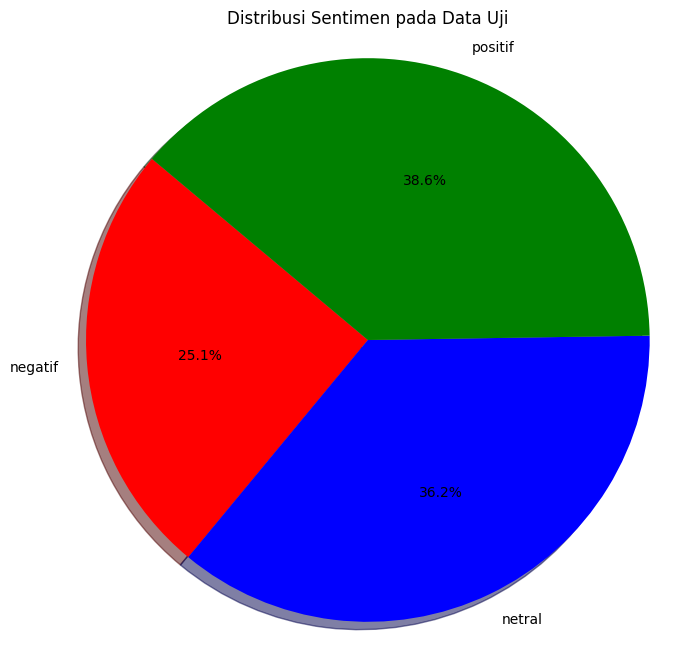

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import joblib

# Muat data uji
X_test = pd.read_csv('HASIL-RISET/X_test.csv')

# Muat model dari file joblib
nb_model = joblib.load('HASIL-RISET/nb_model.pkl')

# Lakukan prediksi pada data uji
y_pred = nb_model.predict(X_test)

# Ekspor hasil prediksi ke file CSV
predictions_df = pd.DataFrame(y_pred, columns=['predicted_label'])
predictions_df.to_csv('HASIL-RISET/y_pred_naive_bayes.csv', index=False)

# Hitung jumlah prediksi untuk setiap kelas
unique, counts = np.unique(y_pred, return_counts=True)
sentiment_counts = dict(zip(unique, counts))

# Buat pie chart
labels = sentiment_counts.keys()
sizes = sentiment_counts.values()
colors = ['red', 'blue', 'green']
# explode = (0.1, 0, 0)  # Hanya meledakkan bagian pertama (Negatif)

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.title('Distribusi Sentimen pada Data Uji')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

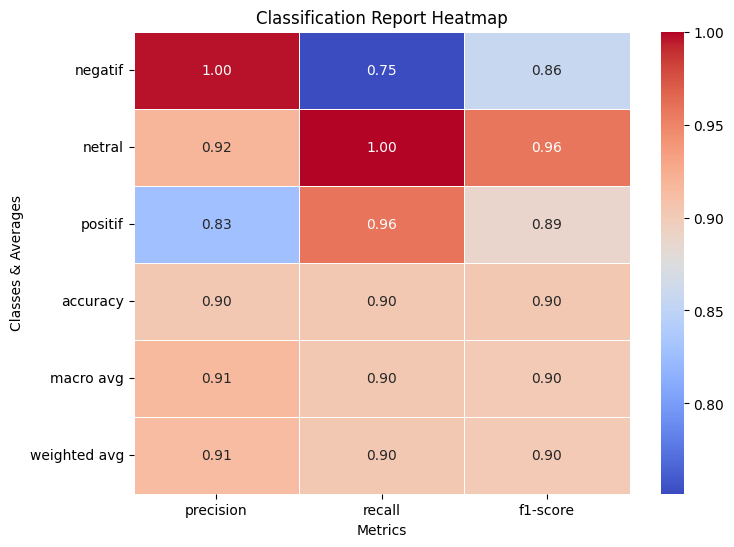

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Mendapatkan classification report dalam bentuk dictionary
report = classification_report(y_test, y_pred, output_dict=True)

# Mengonversi ke DataFrame untuk visualisasi
df_report = pd.DataFrame(report).T

# Menghapus support karena bukan metrik evaluasi
df_report = df_report.drop(columns=['support'])

# Membuat heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_report, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Classification Report Heatmap")
plt.ylabel("Classes & Averages")
plt.xlabel("Metrics")
plt.show()

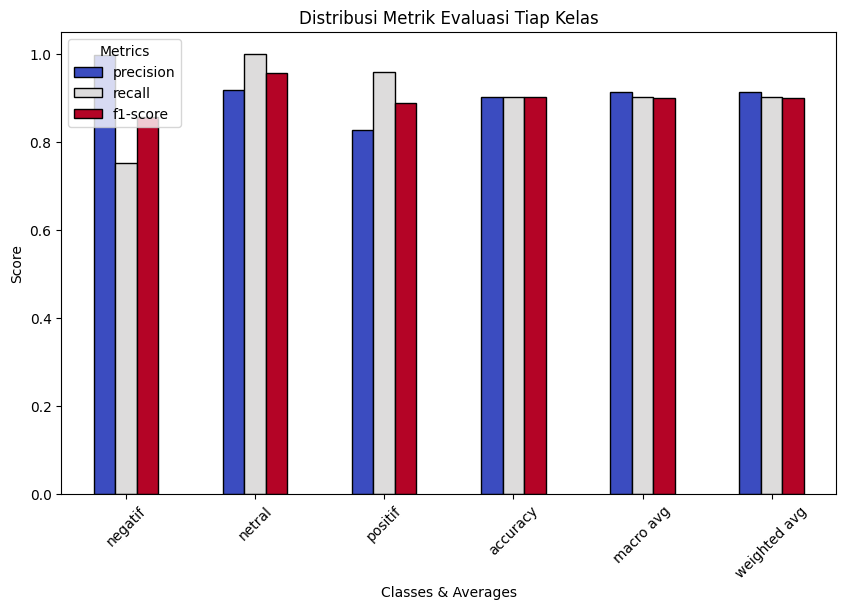

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report

# Contoh report
report = classification_report(y_test, y_pred, output_dict=True)

# Mengonversi ke DataFrame
df_report = pd.DataFrame(report).T

# Menghapus kolom support
df_report = df_report.drop(columns=['support'])

# Membuat bar chart
df_report.plot(kind='bar', figsize=(10, 6), colormap='coolwarm', edgecolor='black')
plt.title("Distribusi Metrik Evaluasi Tiap Kelas")
plt.ylabel("Score")
plt.xlabel("Classes & Averages")
plt.xticks(rotation=45)
plt.legend(title="Metrics")
plt.show()


c:\Users\62851\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\62851\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\62851\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


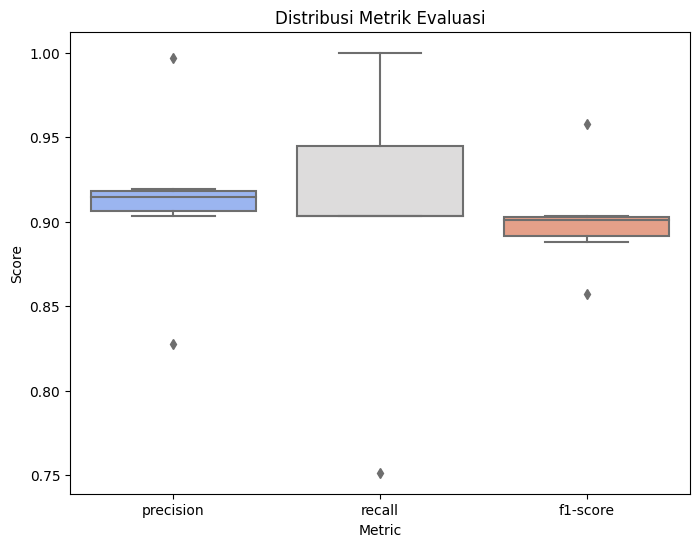

In [6]:
# Mengubah data ke format long untuk seaborn
df_long = df_report.reset_index().melt(id_vars=['index'], var_name='Metric', value_name='Score')

# Plot boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Metric', y='Score', data=df_long, palette='coolwarm')
plt.title("Distribusi Metrik Evaluasi")
plt.xlabel("Metric")
plt.ylabel("Score")
plt.show()


c:\Users\62851\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\62851\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


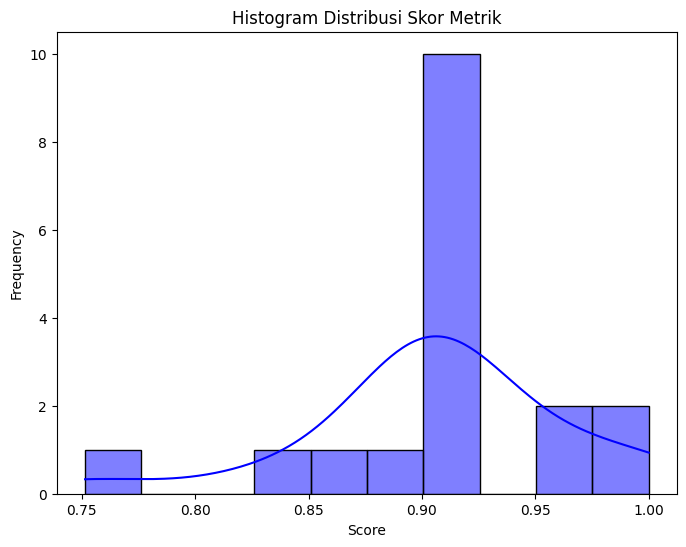

In [7]:
plt.figure(figsize=(8, 6))
sns.histplot(df_long['Score'], bins=10, kde=True, color='blue')
plt.title("Histogram Distribusi Skor Metrik")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()
